<a href="https://colab.research.google.com/github/90485462/ISOM676/blob/main/Assignment_3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f3f1cb057d3b29a33153b3e563633eecde5ca57b4db322f16b691efab0f6af67
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create a list of attribute names based on the provided information
attribute_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "class_label"
]

In [ ]:
spark = SparkSession.builder.appName("SpamBase Classification").getOrCreate()

In [ ]:
# Load the dataset with column names
df_spambase = spark.read.csv(
    '/content/drive/My Drive/spambase.data',
    inferSchema=True,
    header=False
).toDF(*attribute_names)

In [ ]:
# Print the schema
df_spambase.printSchema()

root
 |-- word_freq_make: double (nullable = true)
 |-- word_freq_address: double (nullable = true)
 |-- word_freq_all: double (nullable = true)
 |-- word_freq_3d: double (nullable = true)
 |-- word_freq_our: double (nullable = true)
 |-- word_freq_over: double (nullable = true)
 |-- word_freq_remove: double (nullable = true)
 |-- word_freq_internet: double (nullable = true)
 |-- word_freq_order: double (nullable = true)
 |-- word_freq_mail: double (nullable = true)
 |-- word_freq_receive: double (nullable = true)
 |-- word_freq_will: double (nullable = true)
 |-- word_freq_people: double (nullable = true)
 |-- word_freq_report: double (nullable = true)
 |-- word_freq_addresses: double (nullable = true)
 |-- word_freq_free: double (nullable = true)
 |-- word_freq_business: double (nullable = true)
 |-- word_freq_email: double (nullable = true)
 |-- word_freq_you: double (nullable = true)
 |-- word_freq_credit: double (nullable = true)
 |-- word_freq_your: double (nullable = true)
 |-- 

In [ ]:
# Show the first 5 rows:
df_spambase.show(5)
# Describe the data (to get summary statistics):
df_spambase.describe().show()

+--------------+-----------------+-------------+------------+-------------+--------------+----------------+------------------+---------------+--------------+-----------------+--------------+----------------+----------------+-------------------+--------------+------------------+---------------+-------------+----------------+--------------+--------------+-------------+---------------+------------+-------------+----------------+-------------+-------------+--------------+----------------+-------------+--------------+-------------+------------+--------------------+--------------+---------------+------------+----------------+------------+-----------------+------------------+-----------------+------------+-------------+---------------+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+------------------------+-----------+
|word_freq_make|word_freq_address|word_freq_all|word_freq_3d|word_freq_our|wo

In [ ]:
# Check for missing values
from pyspark.sql.functions import col, count, when

df_spambase.select([count(when(col(c).isNull(), c)).alias(c) for c in df_spambase.columns]).show()

# Assuming you want to count the distribution of spam vs. non-spam emails as well
df_spambase.groupBy("class_label").count().show()

+--------------+-----------------+-------------+------------+-------------+--------------+----------------+------------------+---------------+--------------+-----------------+--------------+----------------+----------------+-------------------+--------------+------------------+---------------+-------------+----------------+--------------+--------------+-------------+---------------+------------+-------------+----------------+-------------+-------------+--------------+----------------+-------------+--------------+-------------+------------+--------------------+--------------+---------------+------------+----------------+------------+-----------------+------------------+-----------------+------------+-------------+---------------+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+------------------------+-----------+
|word_freq_make|word_freq_address|word_freq_all|word_freq_3d|word_freq_our|wo

#### Feature Distribution

array([[<Axes: title={'center': 'word_freq_make'}>,
        <Axes: title={'center': 'word_freq_address'}>,
        <Axes: title={'center': 'word_freq_all'}>,
        <Axes: title={'center': 'word_freq_3d'}>,
        <Axes: title={'center': 'word_freq_our'}>,
        <Axes: title={'center': 'word_freq_over'}>,
        <Axes: title={'center': 'word_freq_remove'}>,
        <Axes: title={'center': 'word_freq_internet'}>],
       [<Axes: title={'center': 'word_freq_order'}>,
        <Axes: title={'center': 'word_freq_mail'}>,
        <Axes: title={'center': 'word_freq_receive'}>,
        <Axes: title={'center': 'word_freq_will'}>,
        <Axes: title={'center': 'word_freq_people'}>,
        <Axes: title={'center': 'word_freq_report'}>,
        <Axes: title={'center': 'word_freq_addresses'}>,
        <Axes: title={'center': 'word_freq_free'}>],
       [<Axes: title={'center': 'word_freq_business'}>,
        <Axes: title={'center': 'word_freq_email'}>,
        <Axes: title={'center': 'word_f

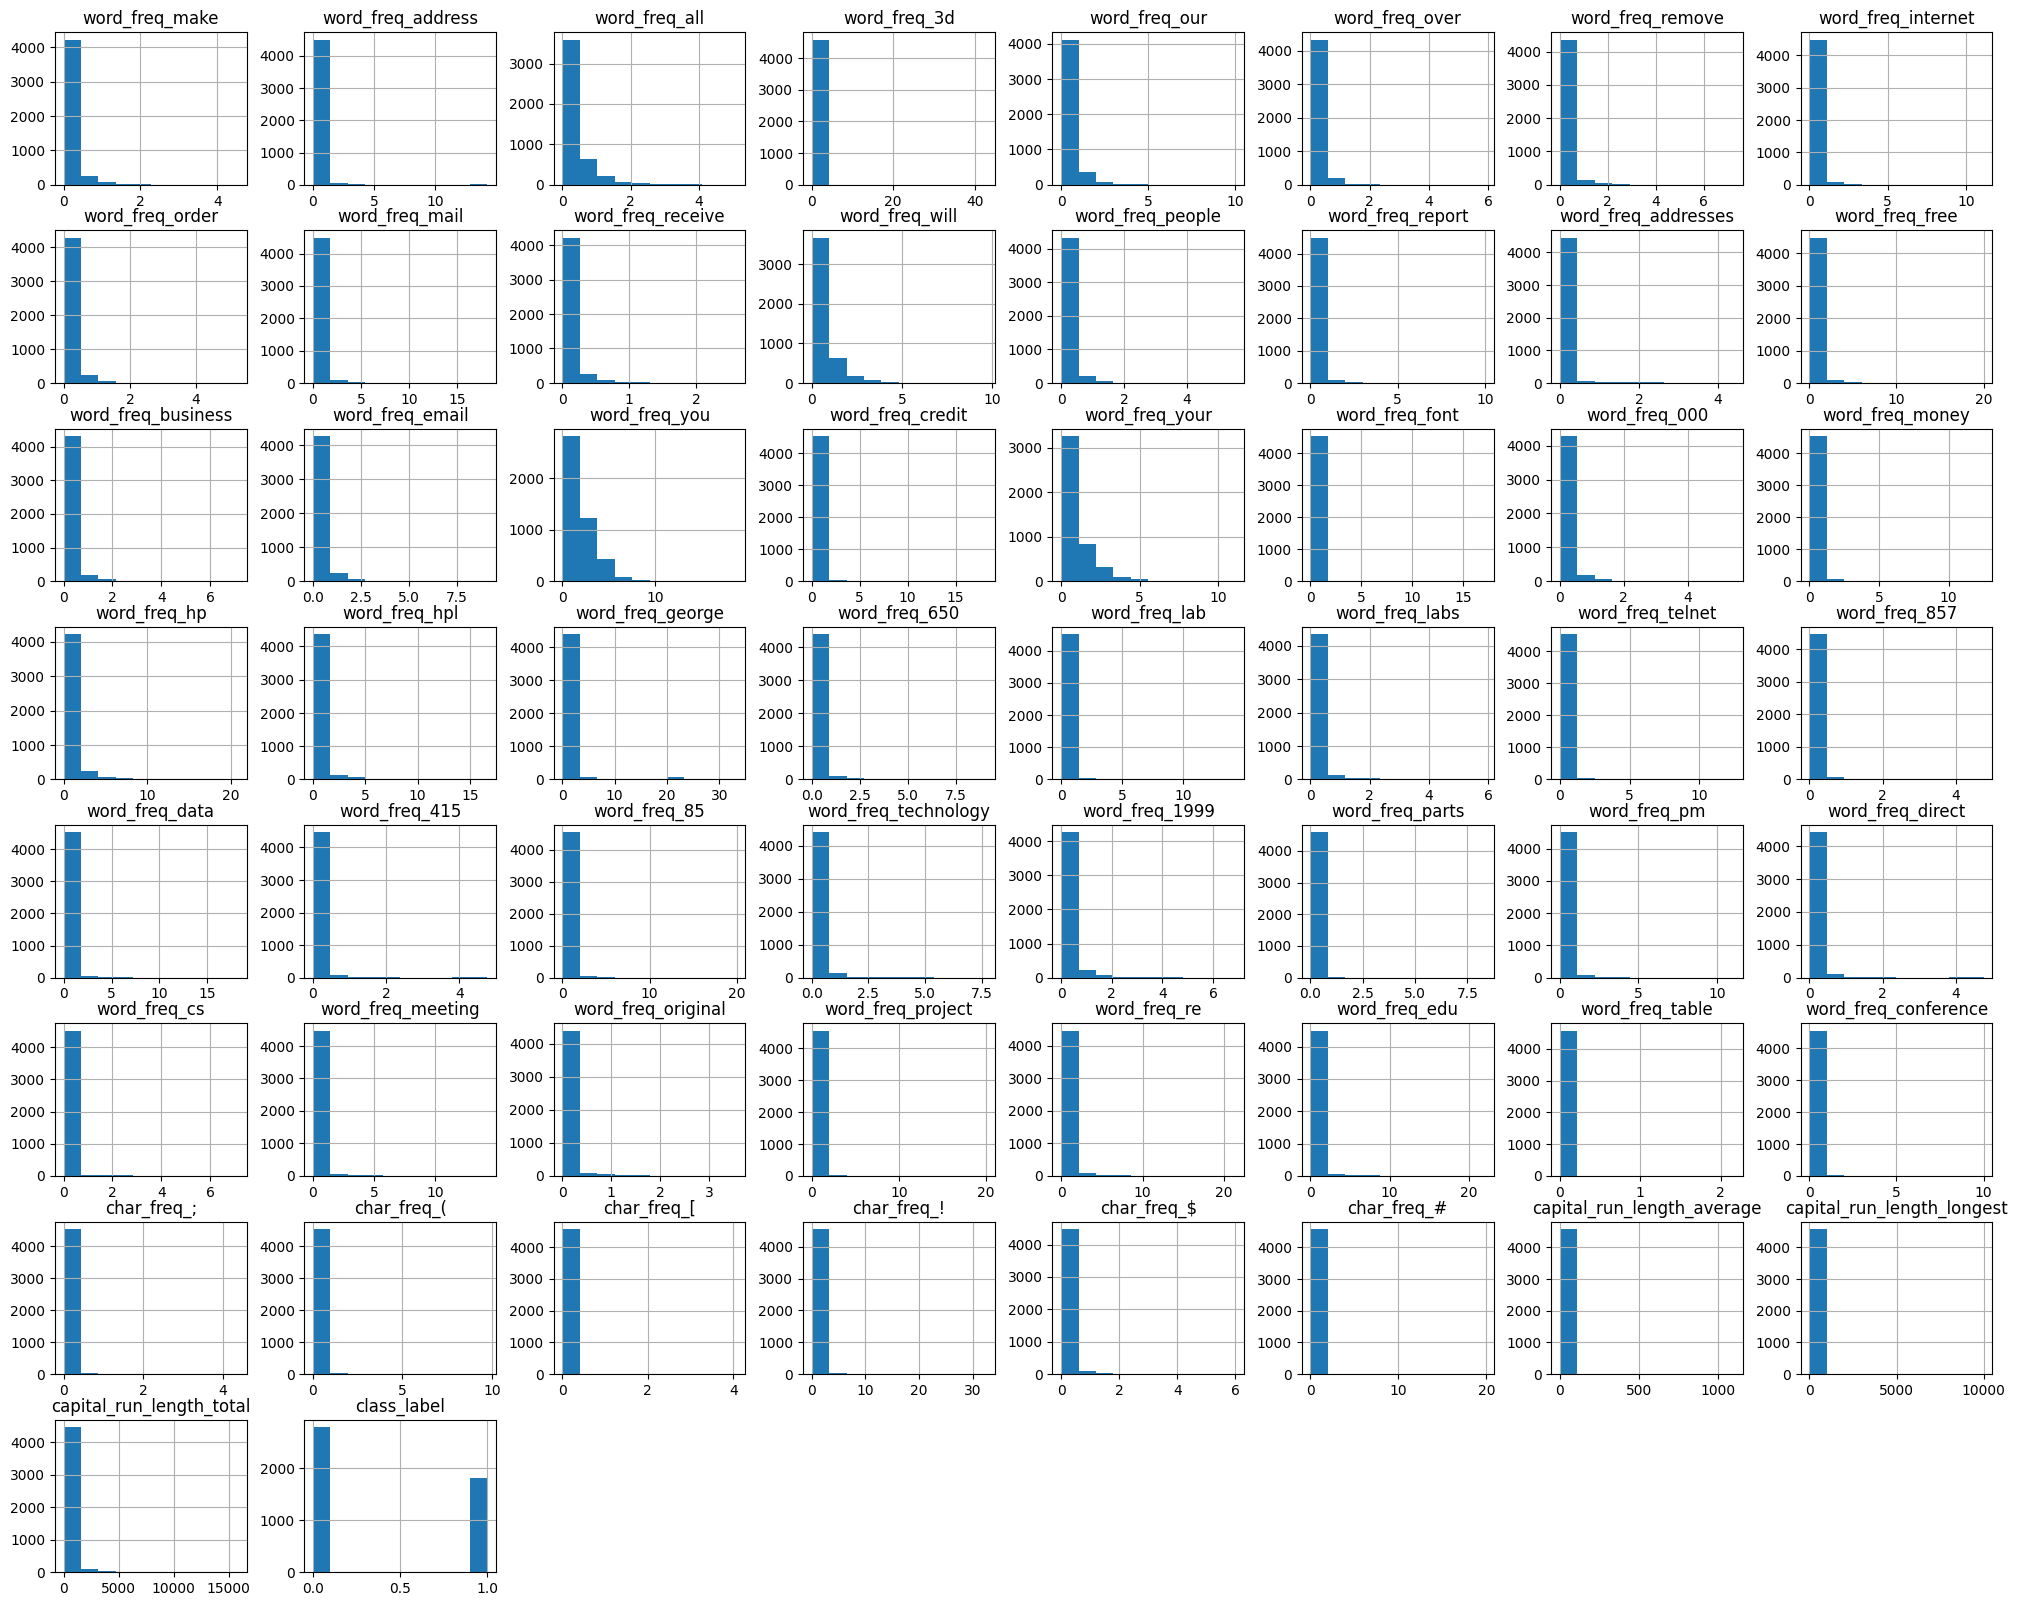

In [ ]:
# Convert to Pandas for easier plotting
pandas_df = df_spambase.toPandas()

# Plotting
pandas_df.hist(figsize=(25, 20))

#### Correlation Matrix

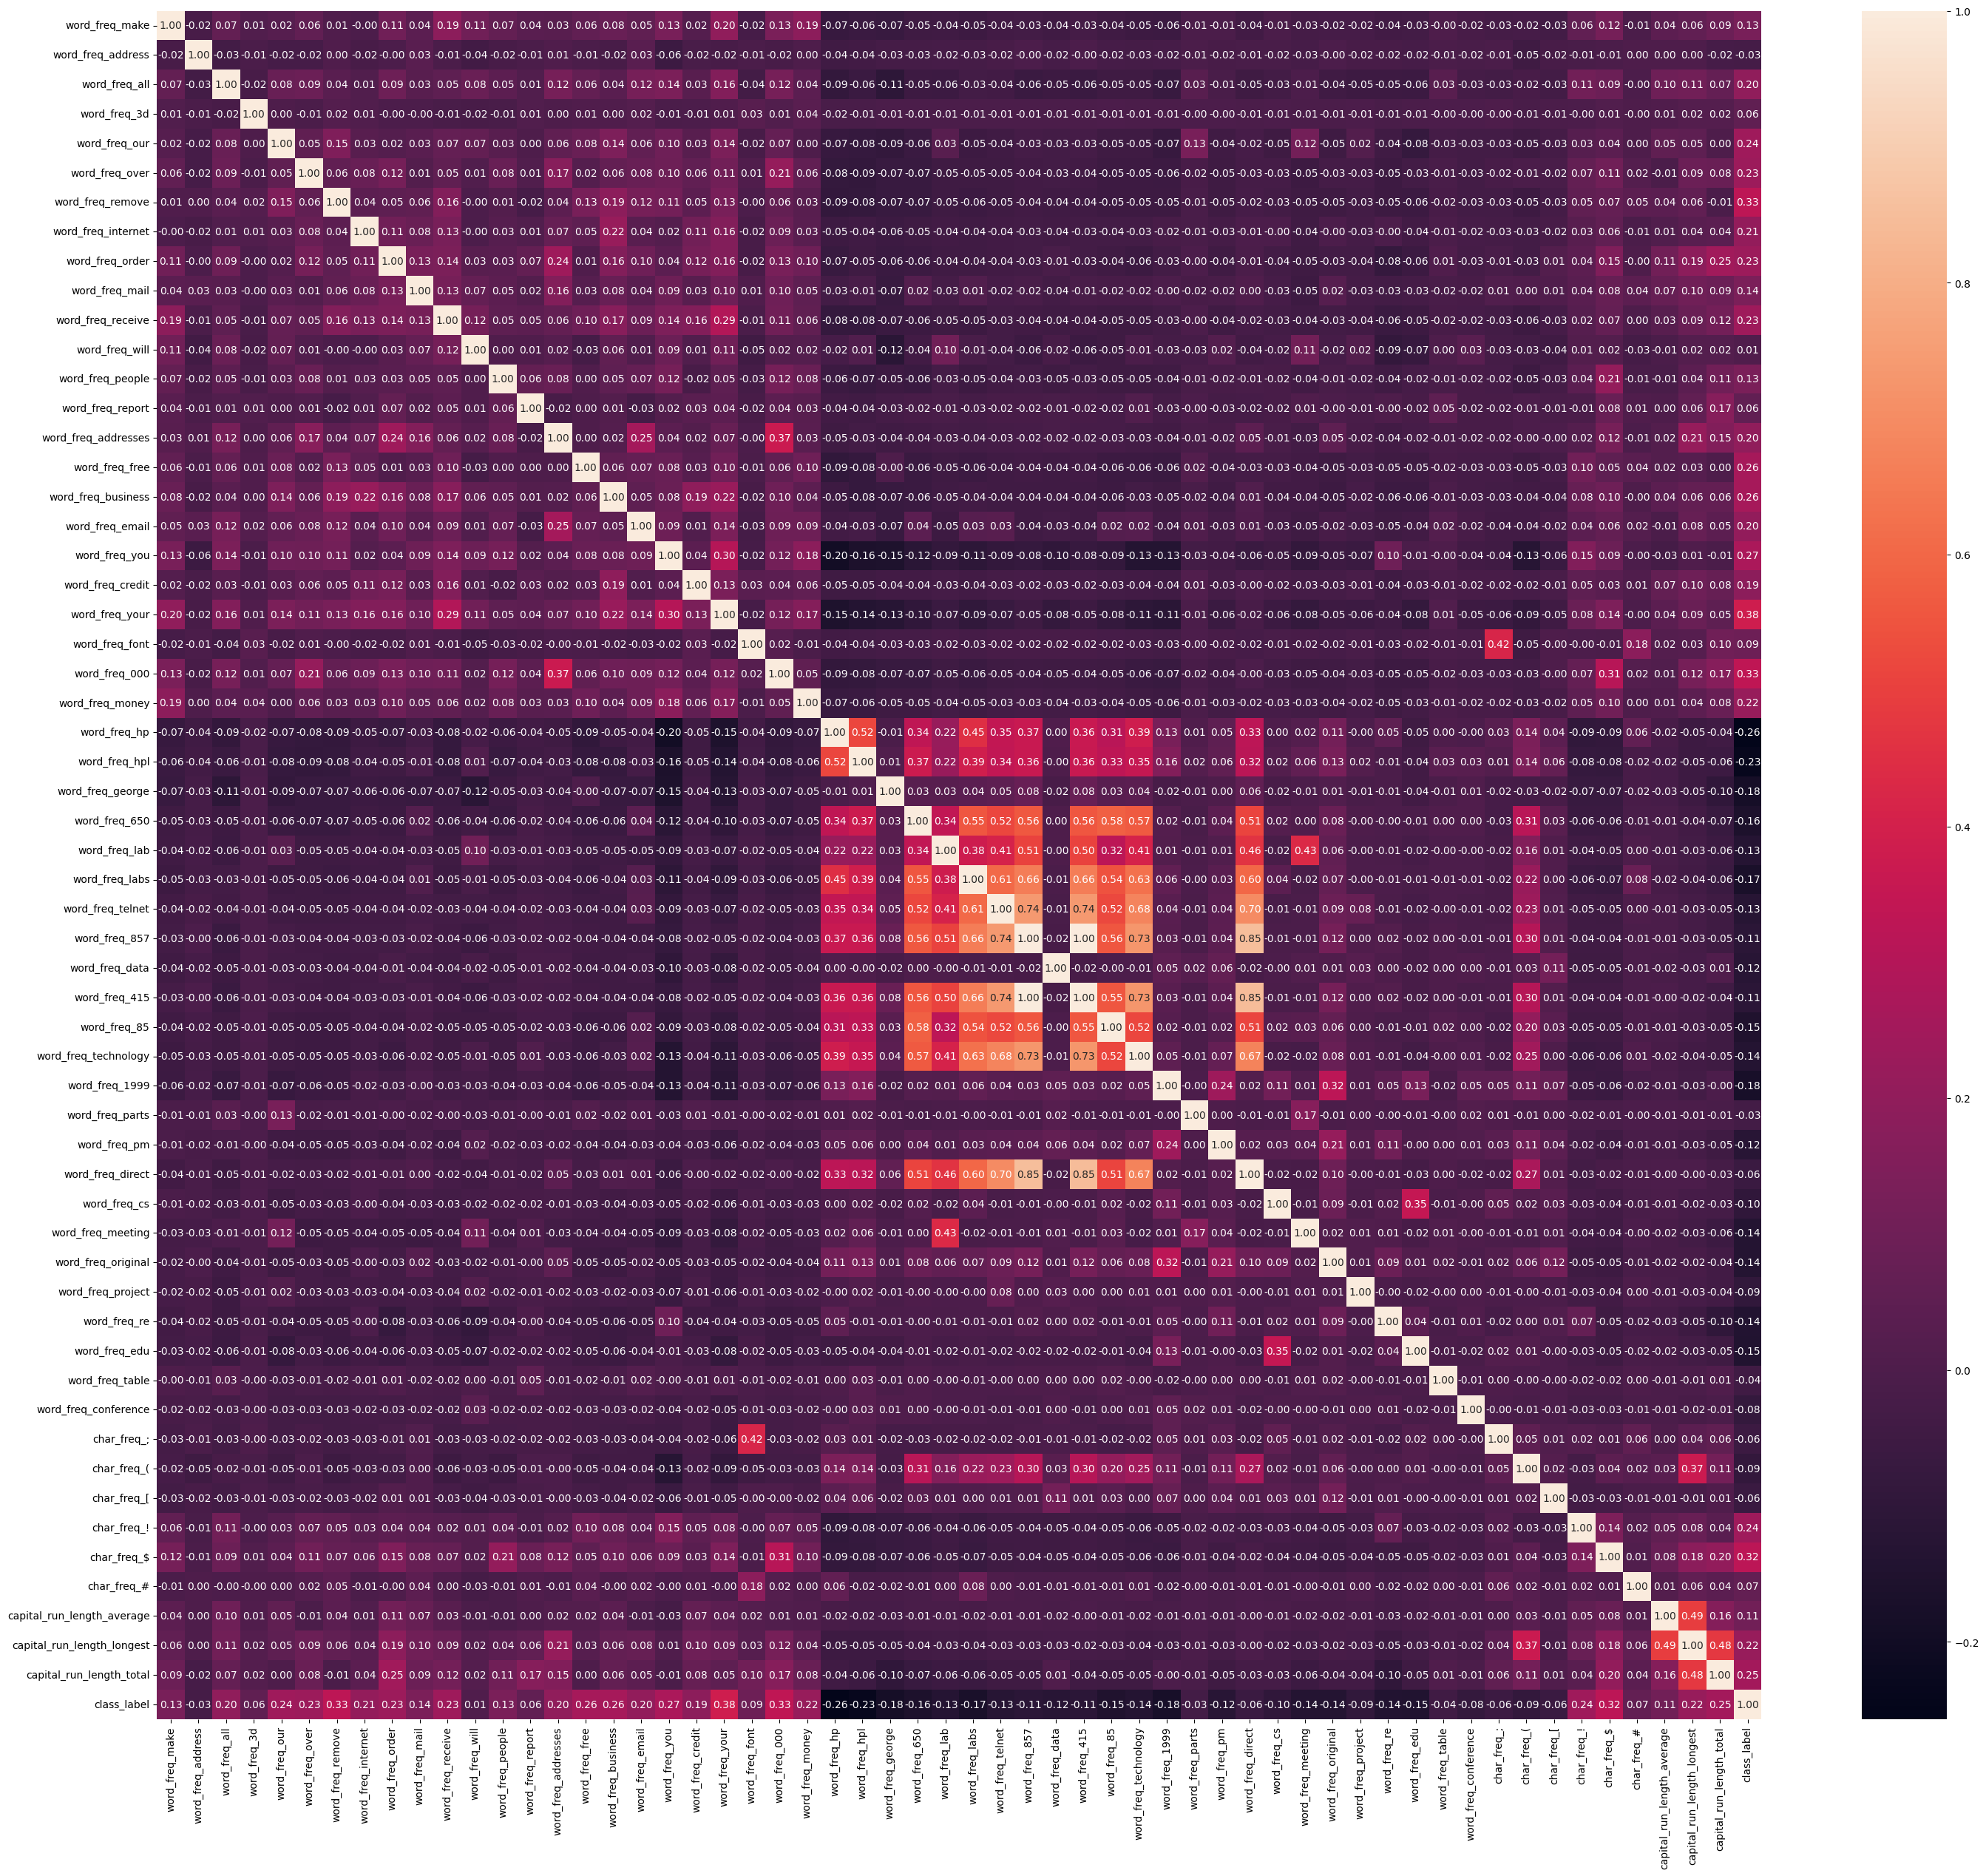

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = pandas_df.corr()

# Heatmap
plt.figure(figsize=(35,30))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


#### Class Distribution

<Axes: >

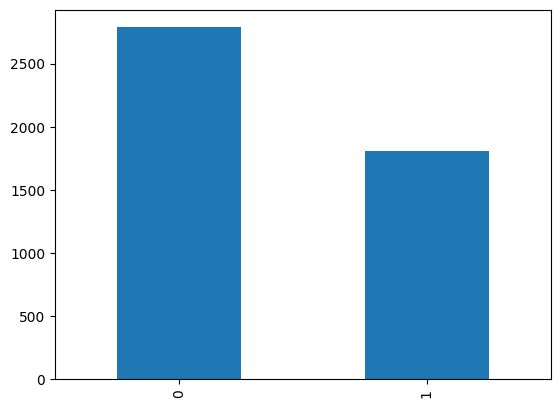

In [ ]:
pandas_df['class_label'].value_counts().plot(kind='bar')

#### Data Preprocessing - Normalization

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

In [ ]:
# Assemble features into a single vector
feature_cols = df_spambase.columns[:-1]  # Exclude the target variable
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

In [ ]:
# Normalize the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)


In [ ]:
# Pipeline: Assemble and Normalize
preprocessing_pipeline = Pipeline(stages=[assembler, scaler])

# Fit and Transform
preprocessed_data = preprocessing_pipeline.fit(df_spambase).transform(df_spambase)

In [ ]:
preprocessed_data.show(5)

+--------------+-----------------+-------------+------------+-------------+--------------+----------------+------------------+---------------+--------------+-----------------+--------------+----------------+----------------+-------------------+--------------+------------------+---------------+-------------+----------------+--------------+--------------+-------------+---------------+------------+-------------+----------------+-------------+-------------+--------------+----------------+-------------+--------------+-------------+------------+--------------------+--------------+---------------+------------+----------------+------------+-----------------+------------------+-----------------+------------+-------------+---------------+--------------------+-----------+-----------+-----------+-----------+-----------+-----------+--------------------------+--------------------------+------------------------+-----------+--------------------+--------------------+
|word_freq_make|word_freq_address|w

#### Split the Dataset

In [ ]:
train_data, test_data = preprocessed_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
test_data.count()

876

In [ ]:
train_data.count()

3725

#### Model Building

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import IndexToString, StringIndexer
from pyspark.ml import Pipeline

In [ ]:
# Convert target into categorical values
labelIndexer = StringIndexer(inputCol="class_label", outputCol="indexedLabel").fit(preprocessed_data)

In [ ]:
# Decision Tree model
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="scaledFeatures")

In [ ]:
# Convert indexed labels back to original labels
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=labelIndexer.labels)


In [ ]:
# Pipeline: indexing, decision tree, and label converter
dt_pipeline = Pipeline(stages=[labelIndexer, dt, labelConverter])

In [ ]:
# Train model
dt_model = dt_pipeline.fit(train_data)

In [ ]:
# Make predictions
dt_predictions = dt_model.transform(test_data)

In [ ]:
# Select example rows to display
dt_predictions.select("predictedLabel", "class_label", "features").show(5)

+--------------+-----------+--------------------+
|predictedLabel|class_label|            features|
+--------------+-----------+--------------------+
|             0|          0|(57,[54,55,56],[1...|
|             0|          0|(57,[54,55,56],[1...|
|             0|          0|(57,[54,55,56],[1...|
|             0|          0|(57,[54,55,56],[1...|
|             0|          0|(57,[54,55,56],[1...|
+--------------+-----------+--------------------+
only showing top 5 rows



#### Model Evaluation

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(dt_predictions)
print("Test Accuracy = %g " % accuracy)


Test Accuracy = 0.915525 


## Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Logistic Regression model
lr = LogisticRegression(labelCol="indexedLabel", featuresCol="scaledFeatures")

# Pipeline for Logistic Regression
lr_pipeline = Pipeline(stages=[labelIndexer, lr, labelConverter])

# Train model
lr_model = lr_pipeline.fit(train_data)

# Make predictions
lr_predictions = lr_model.transform(test_data)


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(lr_predictions)
print("Test Accuracy = %g " % accuracy)

Test Accuracy = 0.928082 


## Random Forest Classifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="scaledFeatures", numTrees=10)

# Pipeline for Random Forest
rf_pipeline = Pipeline(stages=[labelIndexer, rf, labelConverter])

# Train the model
rf_model = rf_pipeline.fit(train_data)

# Make predictions
rf_predictions = rf_model.transform(test_data)



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the evaluator for classification
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

# Now, use it to evaluate the Random Forest model's predictions
accuracy = multiclass_evaluator.evaluate(rf_predictions)
print(f"Random Forest Model Accuracy: {accuracy}")


Random Forest Model Accuracy: 0.9155251141552512


In [ ]:
# Assuming rf_model is your trained RandomForest model
importances = rf_model.stages[-2].featureImportances

# Display the importance of each feature
print(importances)


(57,[1,3,4,6,7,9,10,11,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,32,33,34,36,38,40,41,42,43,44,45,48,49,50,51,52,53,54,55,56],[0.008044947438540062,0.0017484360156586412,0.043107359084885694,0.10869940971929141,0.010541816923324851,0.0056170720510035944,0.0005748877557465693,0.0015540272285174067,0.09283705839341715,0.009908068655376428,0.0022324780445756418,0.009992601867828023,0.004621931127351823,0.11711455391006052,0.00044023614290765537,0.02947345490895137,0.07712869152821536,0.04361435913816169,0.02517224970659439,0.029016826803319996,0.0012060508061002913,0.012782915919067077,0.0005179746110078924,0.00047476082131532664,0.0002866152294111075,0.002581389767122867,0.010215766839778474,0.00032069928169076666,0.0009583171195513956,0.0068273382965776215,0.0015652136062774846,0.0006090699620418576,0.0020654676377102267,0.007357915158062655,0.00030652461190674177,0.0031664849880130457,0.00031220730921796113,0.11280949911935916,0.1300360648645747,0.0001437621266763933,0.0147453540353

In [ ]:
importances = rf_model.stages[-2].featureImportances

# Assuming you have a list of feature names
feature_names = feature_cols  # If you've used VectorAssembler on a list of column names
importances_list = [(feature_names[i], importances[i]) for i in range(len(feature_names))]
sorted_importances = sorted(importances_list, key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


Feature Importances:
char_freq_$: 0.1300360648645747
word_freq_your: 0.11711455391006052
char_freq_!: 0.11280949911935916
word_freq_remove: 0.10869940971929141
word_freq_free: 0.09283705839341715
word_freq_money: 0.07712869152821536
word_freq_hp: 0.04361435913816169
word_freq_our: 0.043107359084885694
capital_run_length_total: 0.04274009710864954
word_freq_000: 0.02947345490895137
word_freq_george: 0.029016826803319996
capital_run_length_longest: 0.02653004433678549
word_freq_hpl: 0.02517224970659439
capital_run_length_average: 0.01474535403537349
word_freq_labs: 0.012782915919067077
word_freq_internet: 0.010541816923324851
word_freq_1999: 0.010215766839778474
word_freq_you: 0.009992601867828023
word_freq_business: 0.009908068655376428
word_freq_address: 0.008044947438540062
word_freq_edu: 0.007357915158062655
word_freq_meeting: 0.0068273382965776215
word_freq_mail: 0.0056170720510035944
word_freq_credit: 0.004621931127351823
char_freq_(: 0.0031664849880130457
word_freq_85: 0.002581389

#### Evaluate Using Additional Metrics such as precision, recall, F1 score, and AUC-ROC.

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Initialize evaluators
binary_evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel")
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", metricName="accuracy")

# Evaluate models
for predictions in [dt_predictions, lr_predictions, rf_predictions]:
    accuracy = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "accuracy"})
    precision = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
    recall = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "weightedRecall"})
    f1 = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "f1"})
    auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: "areaUnderROC"})

    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}, AUC: {auc}")

Accuracy: 0.9155251141552512, Precision: 0.9183753453127848, Recall: 0.9155251141552512, F1: 0.9147393224880911, AUC: 0.7656559803958047
Accuracy: 0.928082191780822, Precision: 0.9280326135207174, Recall: 0.9280821917808219, F1: 0.9280463166332236, AUC: 0.9709870669721412
Accuracy: 0.9155251141552512, Precision: 0.9190851607855466, Recall: 0.9155251141552512, F1: 0.9146419102705181, AUC: 0.9769485921445012


#### Hyperparameter Tuning

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# ParamGrid for Logistic Regression
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.maxIter, [10, 20]) \
    .build()

# CrossValidator
cv = CrossValidator(estimator=lr_pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=multiclass_evaluator,
                    numFolds=5)

# Run cross-validation, and choose the best set of parameters.
cv_model = cv.fit(train_data)

# Make predictions on test data. cvModel uses the best model found.
cv_predictions = cv_model.transform(test_data)

# Evaluate the best model
accuracy = multiclass_evaluator.evaluate(cv_predictions)
print(f"Best Model Accuracy: {accuracy}")


Best Model Accuracy: 0.9143835616438356


#### Further Evaluation Metrics

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# For binary classification (Logistic Regression, Decision Tree)
binary_evaluator = BinaryClassificationEvaluator(labelCol="indexedLabel")

# For multiclass classification
multi_evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", metricName="accuracy")

# Calculate precision, recall, F1-score
precision = multi_evaluator.evaluate(dt_predictions, {multi_evaluator.metricName: "weightedPrecision"})
recall = multi_evaluator.evaluate(dt_predictions, {multi_evaluator.metricName: "weightedRecall"})
f1 = multi_evaluator.evaluate(dt_predictions, {multi_evaluator.metricName: "f1"})

# Calculate AUC
auc = binary_evaluator.evaluate(dt_predictions, {binary_evaluator.metricName: "areaUnderROC"})

print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc}")


Precision: 0.9183753453127848, Recall: 0.9155251141552512, F1 Score: 0.9147393224880911, AUC: 0.7656559803958047


#### Hyperparameter Tuning

In [ ]:

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 20]) \
    .addGrid(dt.maxBins, [20, 32]) \
    .build()

crossval = CrossValidator(estimator=dt_pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=multi_evaluator,
                          numFolds=5)

cv_model = crossval.fit(train_data)
cv_predictions = cv_model.transform(test_data)
cv_accuracy = multi_evaluator.evaluate(cv_predictions)
print(f"CV Accuracy: {cv_accuracy}")


CV Accuracy: 0.9257990867579908


### SVM - Support Vector Machine

In [ ]:
from pyspark.ml.feature import StringIndexer

# Convert target into categorical values
labelIndexer = StringIndexer(inputCol="class_label", outputCol="indexedLabel")
indexed_data = labelIndexer.fit(df_spambase).transform(preprocessed_data)

# Split the indexed data into training and test sets
train_data, test_data = indexed_data.randomSplit([0.8, 0.2], seed=42)

# Now your train_data and test_data have the "indexedLabel" column


In [ ]:
from pyspark.ml.classification import LinearSVC

# Initialize the SVM model
svm = LinearSVC(labelCol="indexedLabel", featuresCol="scaledFeatures")

# Fit the model on the training data
svm_model = svm.fit(train_data)

# Make predictions on the test data
svm_predictions = svm_model.transform(test_data)

# Evaluate the accuracy of the SVM model
svm_accuracy = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy"
).evaluate(svm_predictions)

print(f"SVM Test Accuracy: {svm_accuracy}")


SVM Test Accuracy: 0.9292237442922374


### GBM Model

In [ ]:
from pyspark.ml.feature import StringIndexer

# Convert target into categorical values
labelIndexer = StringIndexer(inputCol="class_label", outputCol="indexedLabel")
indexed_data = labelIndexer.fit(df_spambase).transform(preprocessed_data)

# Split the indexed data into training and test sets
train_data, test_data = indexed_data.randomSplit([0.8, 0.2], seed=42)


In [ ]:
from pyspark.ml.classification import GBTClassifier

# Initialize the GBT model
gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="scaledFeatures", maxIter=10)

# Fit the model on the training data
gbt_model = gbt.fit(train_data)

# Make predictions on the test data
gbt_predictions = gbt_model.transform(test_data)


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy"
)
gbt_accuracy = evaluator.evaluate(gbt_predictions)
print(f"GBT Test Accuracy: {gbt_accuracy}")


GBT Test Accuracy: 0.9360730593607306


## Cost-sensitive Analysis

In [ ]:
def calculate_average_cost(predictions, cost_fp=1, cost_fn=10):
    # Adjust column name if necessary
    label_col = 'class_label'  # Adjust this line based on the actual label column name

    predictions = predictions.withColumn('cost',
                                         when((predictions[label_col] == 0) & (predictions['prediction'] == 1), cost_fp)
                                         .when((predictions[label_col] == 1) & (predictions['prediction'] == 0), cost_fn)
                                         .otherwise(0))
    total_cost = predictions.groupBy().sum('cost').collect()[0][0]
    num_instances = predictions.count()
    average_cost = total_cost / num_instances
    return average_cost

In [ ]:
rf_average_cost = calculate_average_cost(rf_predictions)
gbt_average_cost = calculate_average_cost(gbt_predictions)
svm_average_cost = calculate_average_cost(svm_predictions)
dt_average_cost = calculate_average_cost(dt_predictions)
lr_average_cost = calculate_average_cost(lr_predictions)

print(f"Random Forest Average Cost: {rf_average_cost}")
print(f"Gradient Boosted Trees Average Cost: {gbt_average_cost}")
print(f"SVM Average Cost: {svm_average_cost}")
print(f"Decision Tree Average Cost: {dt_average_cost}")
print(f"Logistic Regression Average Cost: {lr_average_cost}")

Random Forest Average Cost: 0.7009132420091324
Gradient Boosted Trees Average Cost: 0.4954337899543379
SVM Average Cost: 0.4098173515981735
Decision Tree Average Cost: 0.680365296803653
Logistic Regression Average Cost: 0.410958904109589


In [ ]:
# Adjust the assembler and scaler stages to avoid naming conflicts
assembler = VectorAssembler(inputCols=[col for col in df_spambase.columns if col != 'label'], outputCol="features_unscaled")

# Make sure the output column of the scaler is unique
scaler = StandardScaler(inputCol="features_unscaled", outputCol="scaled_features", withStd=True, withMean=True)

# Define your models, referring to the correctly scaled features
svm = LinearSVC(featuresCol="scaled_features", labelCol="label", maxIter=10)
lr = LogisticRegression(featuresCol="scaled_features", labelCol="label", maxIter=10)

# Define pipelines
pipeline_svm = Pipeline(stages=[assembler, scaler, svm])
pipeline_lr = Pipeline(stages=[assembler, scaler, lr])

In [ ]:
# Train the models
model_svm = pipeline_svm.fit(train_data)
model_lr = pipeline_lr.fit(train_data)


IllegalArgumentException: label does not exist. Available: word_freq_make, word_freq_address, word_freq_all, word_freq_3d, word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, word_freq_people, word_freq_report, word_freq_addresses, word_freq_free, word_freq_business, word_freq_email, word_freq_you, word_freq_credit, word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp, word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs, word_freq_telnet, word_freq_857, word_freq_data, word_freq_415, word_freq_85, word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm, word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original, word_freq_project, word_freq_re, word_freq_edu, word_freq_table, word_freq_conference, char_freq_;, char_freq_(, char_freq_[, char_freq_!, char_freq_$, char_freq_#, capital_run_length_average, capital_run_length_longest, capital_run_length_total, class_label, features, scaledFeatures, indexedLabel, features_unscaled, scaled_features